# 1. The problem statement

#### When the company is developing with various offers it is starting getting the reviews from the customers and the reviews are accompanied with the rating or start as well.


#### We have a dataset with reviews and the rating given by users. We need to find out the best algorithm to learn and classify the test dataset reviews.

#### In this project we need to classify the reviews into the 5 categories: 1,2,3,4,5.

## Import Libraries

In [2]:
import ssl
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import nltk

from IPython.core.display import display, HTML
from nltk.corpus import stopwords
from collections import defaultdict
from wordcloud import WordCloud

nltk.download("stopwords")


import os

import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder


import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from imblearn.pipeline import Pipeline

from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# 2. EDA

In [4]:
data = pd.read_csv("./dataset.csv")
print(data.shape)
data.head()

(48665, 2)


,rate,text
0,4,Очень понравилось. Были в начале марта с соба...
1,5,В целом магазин устраивает.\nАссортимент позво...
2,5,"Очень хорошо что открылась 5 ка, теперь не над..."
3,3,Пятёрочка громко объявила о том как она заботи...
4,3,"Тесно, вечная сутолока, между рядами трудно ра..."


## Target Distributions

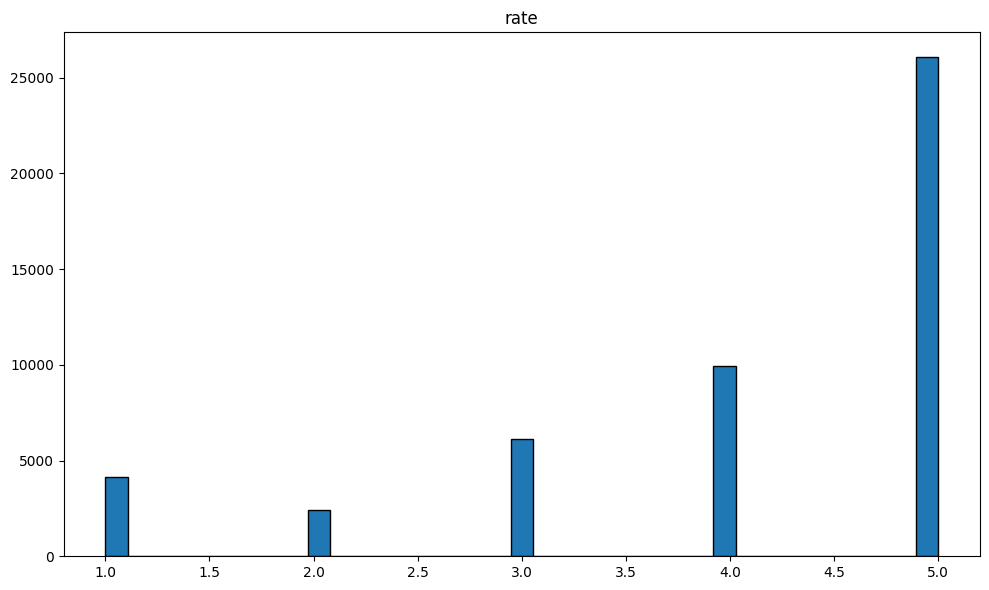

In [5]:
fig, axes = plt.subplots(1, 1, figsize=(10, 6))

sns.histplot(x="rate", data=data, linewidth=1,
             alpha=1, ax=axes, zorder=2)
axes.set_title("rate")
axes.set(xlabel=None, ylabel=None)

plt.tight_layout()
plt.show()


# Distribution of the ratings in %

In [6]:
print(data.rate.value_counts(normalize=True))

5    0.535683
4    0.203884
3    0.125881
1    0.085030
2    0.049522
Name: rate, dtype: float64


# Number of words

In [7]:
print("Number words in train dataset: ", len(
    " ".join(data.text.tolist()).split()))


Number words in train dataset:  879144


# Vocabulary size

In [8]:
vocab_size = len(set(" ".join(data.text.tolist()).split(
)))
print("Vocabulary size: ", vocab_size)


Vocabulary size:  101989


# Examples of the test and the ratings

In [9]:
# rating 1
print(data[data.rate == 1].iloc[0][1])

Цена на кассе вечно не соответствует цене в зале. Будьте внимательны, обходите стороной.




In [10]:
# rating 2
print(data[data.rate == 2].iloc[0][1])

Маленький выбор ,высокие цены,персонал тоже так себе некоторых надо уволить.


In [11]:
# rating 3
print(data[data.rate == 3].iloc[0][1])

Пятёрочка громко объявила о том как она заботится о пенсионерах, установив часы посещения магазинов сети с 8-00 до 10-00, чтобы они не заразились короновирусом. Что имеем в это время: хлеба нет, моркови нет, лимонов нет и т.д. Объясняют, что ещё не было завоза, тогда зачем приглашают?


In [12]:
# rating 4
print(data[data.rate == 4].iloc[0][1])

Очень понравилось. Были в начале марта  с собакой. Дошли до  лесного озера по зкотропе  . Собака набегалась мы нагулялись. Домик чистый . Для этой цены соответствует. Рекомендую взять с собой посуду, так-как её там мало. Даже для двоих.


In [13]:
# rating 5
print(data[data.rate == 5].iloc[0][1])

В целом магазин устраивает.
Ассортимент позволяет не ходить в другие магазины и все покупать здесь,рядом с домом.
Часто акции .Сроки годности соответствуют.Кассиры доброжелательны.Правда в последний год количество их уменьшилось в разы,часто работает 1 касса,очереди.
В магазине чисто,часто размораживают и моют холодильники.
Но также часто заходишь на недели и нет каких то ходовых товаров- курица,творог и т.д


# Text Analysis

## Number of characters

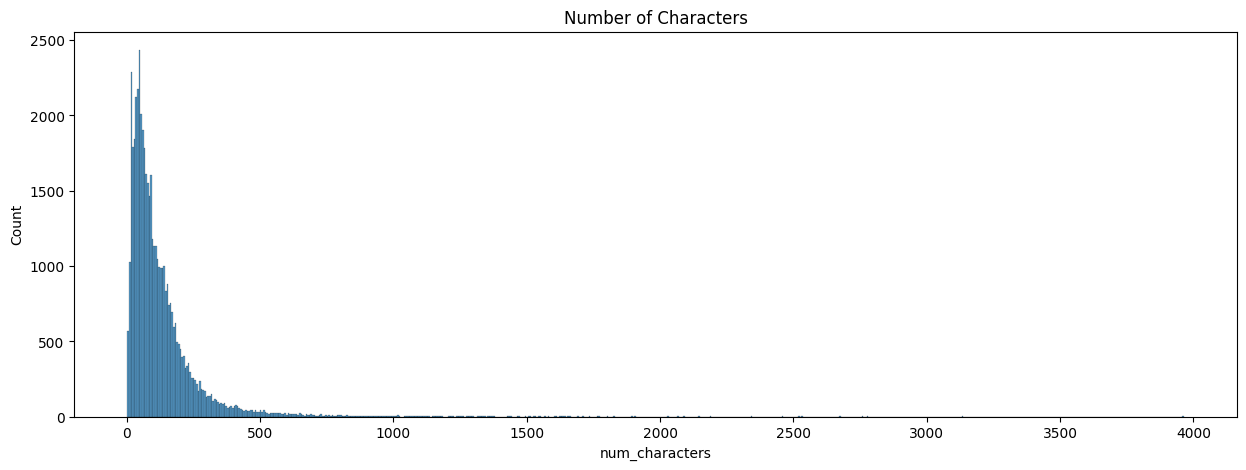

In [14]:
fig = plt.figure(figsize=(15, 5))
data["num_characters"] = data["text"].str.len()

sns.histplot(data=data, x="num_characters")
plt.title("Number of Characters")
plt.show()


## Number of words

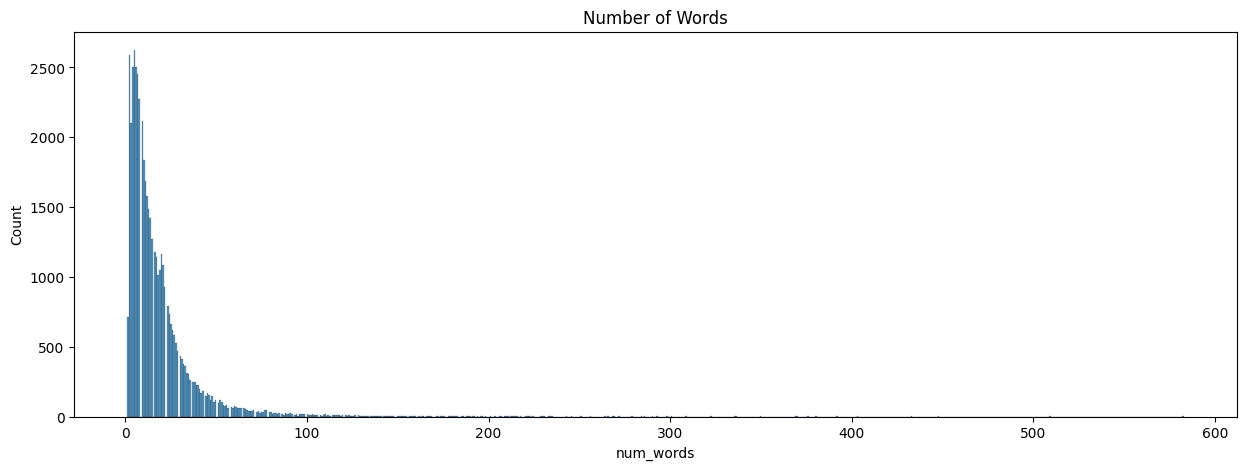

In [15]:
fig = plt.figure(figsize=(15, 5))
data["num_words"] = data["text"].apply(
    lambda x: len(str(x).split()))
sns.histplot(data=data, x="num_words")
plt.title("Number of Words")
plt.show()


## Wordcloud according to the ratings

### Rating 1

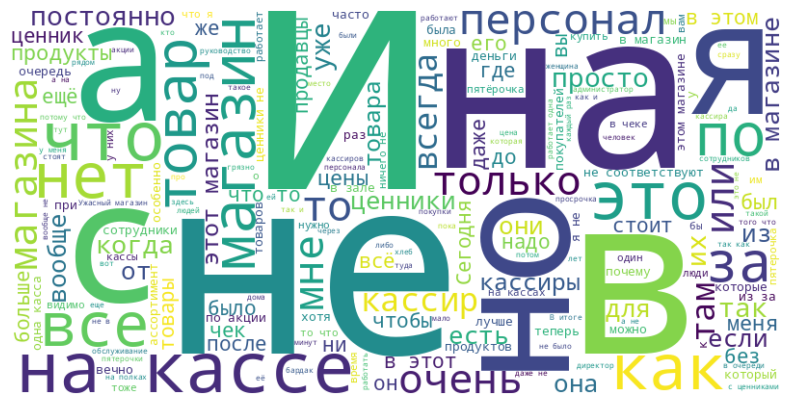

In [16]:
wordcloud = WordCloud(background_color="white", width=800, height=400).generate(
    "".join(map(str, data[data.rate == 1].text)))

plt.figure(figsize=(20, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Rating 2

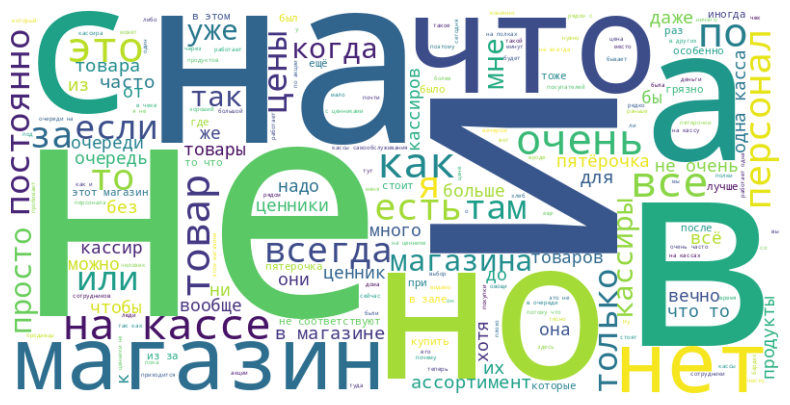

In [17]:
wordcloud = WordCloud(background_color="white", width=800, height=400).generate(
    "".join(map(str, data[data.rate == 2].text)))

plt.figure(figsize=(20, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Rating 3

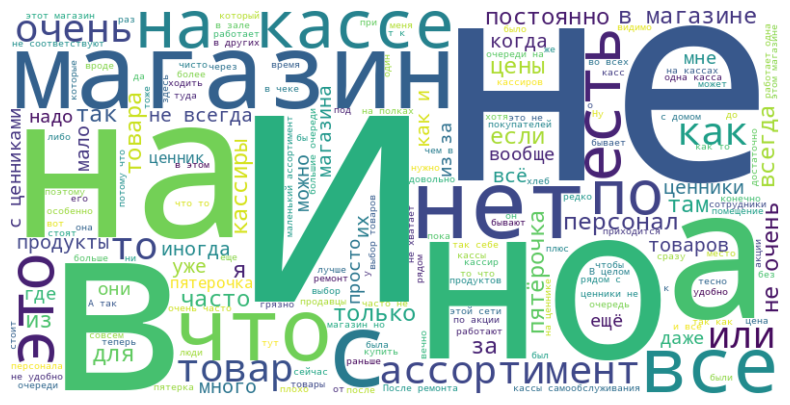

In [18]:
wordcloud = WordCloud(background_color="white", width=800, height=400).generate(
    "".join(map(str, data[data.rate == 3].text)))

plt.figure(figsize=(20, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Rating 4

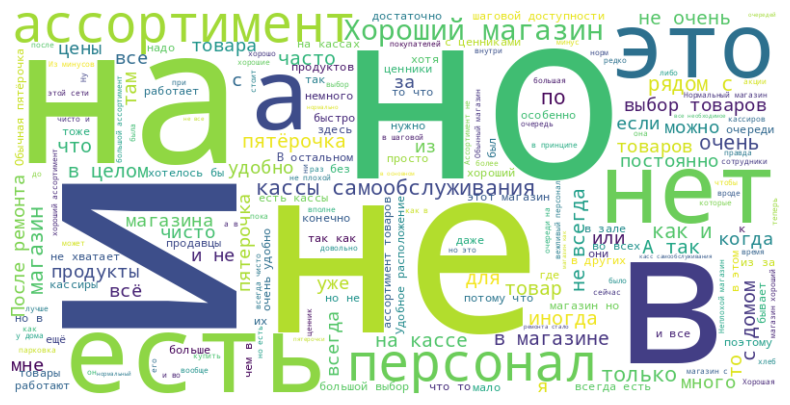

In [19]:
wordcloud = WordCloud(background_color="white", width=800, height=400).generate(
    "".join(map(str, data[data.rate == 4].text)))

plt.figure(figsize=(20, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Rating 5

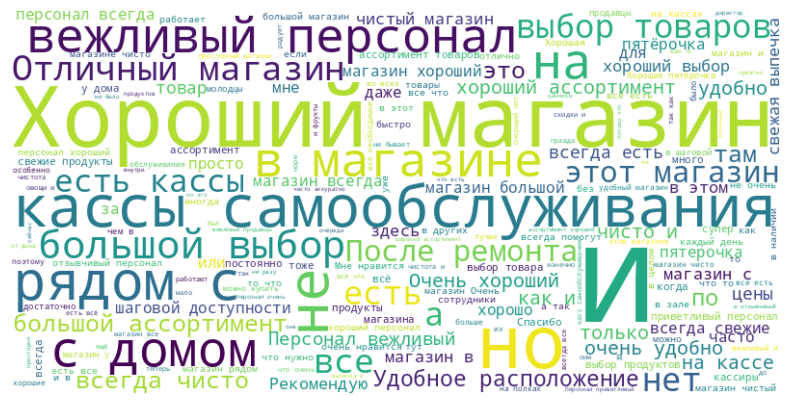

In [20]:
wordcloud = WordCloud(background_color="white", width=800, height=400).generate(
    "".join(map(str, data[data.rate == 5].text)))

plt.figure(figsize=(20, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# 3. Training the models

# Training 1 with simple Text Processing

### We will vectorize the text in order to train the model with removing the stopwords from the Russian language corpora

In [60]:
stopwords = nltk.corpus.stopwords.words("russian")

vect_word = TfidfVectorizer(
    max_features=100,
    lowercase=True,
    analyzer="word",
    stop_words=stopwords,
    ngram_range=(1, 3),
    dtype=np.float32
)


from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(data,
                                          test_size = 0.25,
                                          random_state=42, stratify = data.rate)

X_train = vect_word.fit_transform(df_train["text"])
X_test = vect_word.fit_transform(df_test["text"])

y_train = df_train.rate
y_test = df_test.rate

In [61]:
models = [
              LinearSVC(random_state=2),
              MultinomialNB(),
              RandomForestClassifier(random_state=2),
              LogisticRegression(max_iter=1000, random_state=2)
    ]

for model in models:
    print('model: ', model)
    clf = Pipeline([('clf', model)])

    clf.fit(X_train, y_train)


    y_pred_test = clf.predict(X_test)

    print('f1_score on test data: ', f1_score(y_test, y_pred_test, average='weighted'))
    print('-------------------')
    print()

model:  LinearSVC(random_state=2)
f1_score on test data:  0.44254045222889016
-------------------

model:  MultinomialNB()
f1_score on test data:  0.42626738411733267
-------------------

model:  RandomForestClassifier(random_state=2)
f1_score on test data:  0.434190265492823
-------------------

model:  LogisticRegression(max_iter=1000, random_state=2)
f1_score on test data:  0.4477343612439039
-------------------



# Training 2 with removing punctuations

In [48]:
import re
def cleaned_text1(test_str):
# Using filter() and lambda function to filter out punctuation characters
  result = ''.join(filter(lambda x: x.isalpha() or x.isdigit() or x.isspace(), test_str))
  result = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', result)  # remove punctuations
  result = re.sub("(?m)^\\d+\\s.*\r?\n?\\(", " ", result)
  result = re.sub("[\d_-]+.", " ", result)
  result = re.sub('\s+', ' ', result)  # remove extra whitespace

  return result.lower()

In [49]:
data['cleaned_text1'] = data.text.apply(cleaned_text1)

In [50]:
data

,rate,text,num_characters,num_words,cleaned_text1
0,4,Очень понравилось. Были в начале марта с соба...,236,38,очень понравилось были в начале марта с собако...
1,5,В целом магазин устраивает.\nАссортимент позво...,411,56,в целом магазин устраивает ассортимент позволя...
2,5,"Очень хорошо что открылась 5 ка, теперь не над...",71,13,очень хорошо что открылась ка теперь не надо д...
3,3,Пятёрочка громко объявила о том как она заботи...,285,46,пятёрочка громко объявила о том как она заботи...
4,3,"Тесно, вечная сутолока, между рядами трудно ра...",95,14,тесно вечная сутолока между рядами трудно разо...
...,...,...,...,...,...
48660,5,"Удобный, но маленький и ещё не обновили как др...",58,10,удобный но маленький и ещё не обновили как дру...
48661,2,"Постоянно обман в цене,написанна сумма на акци...",291,41,постоянно обман в цененаписанна сумма на акции...
48662,2,Очень хочется пожелать этому магазину стать та...,83,13,очень хочется пожелать этому магазину стать та...
48663,5,"Нравится ваш магазин, персонал одекватный, пор...",51,6,нравится ваш магазин персонал одекватный порядок


In [51]:
vect_word = TfidfVectorizer(
    max_features=100,
    lowercase=True,
    analyzer="word",
    stop_words=stopwords,
    ngram_range=(1, 3),
    dtype=np.float32
)

In [59]:

df_train, df_test = train_test_split(data,
                                          test_size = 0.25,
                                          random_state=42, stratify= data.rate)

X_train = vect_word.fit_transform(df_train["cleaned_text1"])
X_test = vect_word.fit_transform(df_test["cleaned_text1"])

y_train = df_train.rate
y_test = df_test.rate

models = [
              LinearSVC(random_state=2),
              MultinomialNB(),
              RandomForestClassifier(random_state=2),
              LogisticRegression(C=2,random_state=42
)
    ]

for model in models:
    print('model: ', model)
    clf = Pipeline([('clf', model)])

    clf.fit(X_train, y_train)


    y_pred_test = clf.predict(X_test)

    print('f1_score on test data: ', f1_score(y_test, y_pred_test, average='weighted'))
    print('-------------------')
    print()

model:  LinearSVC(random_state=2)
f1_score on test data:  0.47103234361554513
-------------------

model:  MultinomialNB()
f1_score on test data:  0.4493351157317901
-------------------

model:  RandomForestClassifier(random_state=2)
f1_score on test data:  0.4742500465340187
-------------------

model:  LogisticRegression(C=2, random_state=42)
f1_score on test data:  0.4848492610555668
-------------------



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 # **XGBoost Classifier**

In [127]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data['label'] = le.fit_transform(data.rate)

In [128]:
df_train, df_test = train_test_split(data,
                                          test_size = 0.25,
                                          random_state=42, stratify= data['label'])

X_train = vect_word.fit_transform(df_train["cleaned_text1"])
X_test = vect_word.fit_transform(df_test["cleaned_text1"])

y_train = df_train['label']
y_test = df_test['label']

model_xgb = xgb.XGBClassifier(
    objective='multi:softprob',
    num_class=5,
    max_depth=100
)
model_xgb.fit(X_train, y_train)

y_pred_xgb = model_xgb.predict(X_test)

print('f1_score on test data: ', f1_score(y_test, y_pred_xgb, average='weighted'))

f1_score on test data:  0.4783209792818974


# The best models are Logistic Regression and the XGBoost with f1_score 0.4848 and 0.4783 respectively

Unfortunately the score is still not good.

In [110]:
from sklearn.metrics import confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt


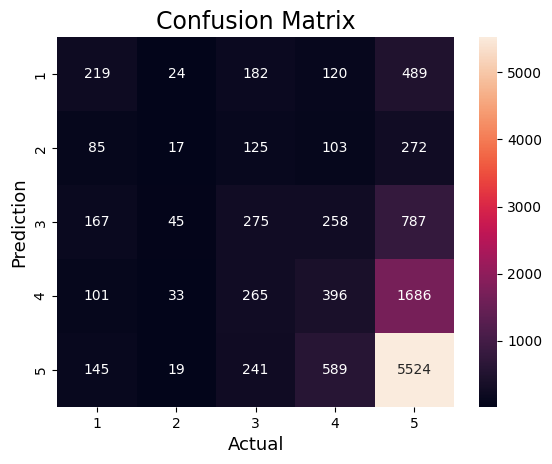

In [132]:
cm = confusion_matrix(y_test, y_pred_xgb)

#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['1', '2', '3', '4', '5'],
            yticklabels=['1', '2', '3', '4', '5'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()